Name : Sourav Basu


Student ID : 20031652


Aretefact Submission

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
import warnings; warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load the data

In [ ]:
# Load the data
df = pd.read_csv("/content/drive/MyDrive/loan.csv")

In [ ]:
print("Shape:", df.shape)
print("\nInfo:")
print(df.info())

Shape: (887379, 74)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               88

#Getting the view of the data

In [ ]:
df.head(20)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1075269,1311441,5000.0,5000.0,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1069639,1304742,7000.0,7000.0,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1072053,1288686,3000.0,3000.0,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1071795,1306957,5600.0,5600.0,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1071570,1306721,5375.0,5375.0,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
print("\nMissing Values:")
print(df.isnull().sum().sort_values(ascending=False).head(20))  # Top 20


Missing Values:
dti_joint                      886870
annual_inc_joint               886868
verification_status_joint      886868
il_util                        868762
mths_since_rcnt_il             866569
inq_fi                         866007
open_rv_24m                    866007
open_acc_6m                    866007
all_util                       866007
inq_last_12m                   866007
total_cu_tl                    866007
open_il_12m                    866007
max_bal_bc                     866007
open_il_6m                     866007
open_il_24m                    866007
open_rv_12m                    866007
total_bal_il                   866007
desc                           761353
mths_since_last_record         750326
mths_since_last_major_derog    665676
dtype: int64


# An Overview of missing values

In [ ]:
 #Total and percentage of missing values
 # Total and percentage of missing values
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing_pct = (missing / len(df)) * 100
# Display top missing columns
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_pct})
print("\nTop Missing Values:")
print(missing_df.head(20))


Top Missing Values:
                             Missing Values  Percentage
dti_joint                            886870   99.942640
annual_inc_joint                     886868   99.942415
verification_status_joint            886868   99.942415
il_util                              868762   97.902024
mths_since_rcnt_il                   866569   97.654892
inq_last_12m                         866007   97.591559
max_bal_bc                           866007   97.591559
all_util                             866007   97.591559
total_cu_tl                          866007   97.591559
total_bal_il                         866007   97.591559
open_il_12m                          866007   97.591559
open_il_24m                          866007   97.591559
open_il_6m                           866007   97.591559
open_acc_6m                          866007   97.591559
open_rv_24m                          866007   97.591559
inq_fi                               866007   97.591559
open_rv_12m                

# Distribution of target variable


Loan Status Distribution:
loan_status
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


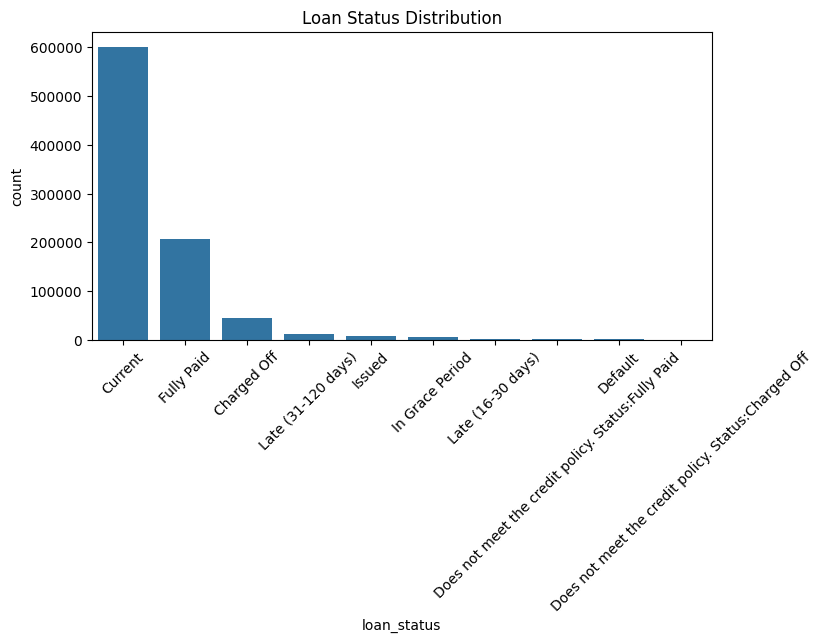

In [ ]:
# Check target variable distribution
print("\nLoan Status Distribution:")
print(df['loan_status'].value_counts())

# Plot distribution
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='loan_status', order=df['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xticks(rotation=45)
plt.show()

# Cleaning - Drop high-missing/identifier columns

In [ ]:
# Drop high-missing/identifier columns
cols_to_drop = ['id', 'member_id', 'url', 'desc', 'title', 'zip_code', 'emp_title',
                'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
                'total_bal_il', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
                'mths_since_last_record', 'next_pymnt_d']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

In [ ]:
# Drop columns with >50% missing
df = df.dropna(thresh=len(df) * 0.5, axis=1)

In [ ]:
# Drop rows missing critical fields
df = df.dropna(subset=['loan_amnt', 'funded_amnt', 'term', 'int_rate', 'loan_status'])

In [ ]:
# Sample only if dataset exceeds 150000 rows
if df.shape[0] > 150000:
    print(f"Dataset has {df.shape[0]} rows. Sampling 150000 rows to avoid memory issues.")
    df = df.dropna(subset=['loan_status'])  # Ensure target column is clean
    df = df.groupby('loan_status', group_keys=False).apply(
        lambda x: x.sample(int(150000 * len(x) / len(df)), random_state=42)
    )
    df = df.reset_index(drop=True)

Dataset has 887379 rows. Sampling 150000 rows to avoid memory issues.


#Loan Status Distribution

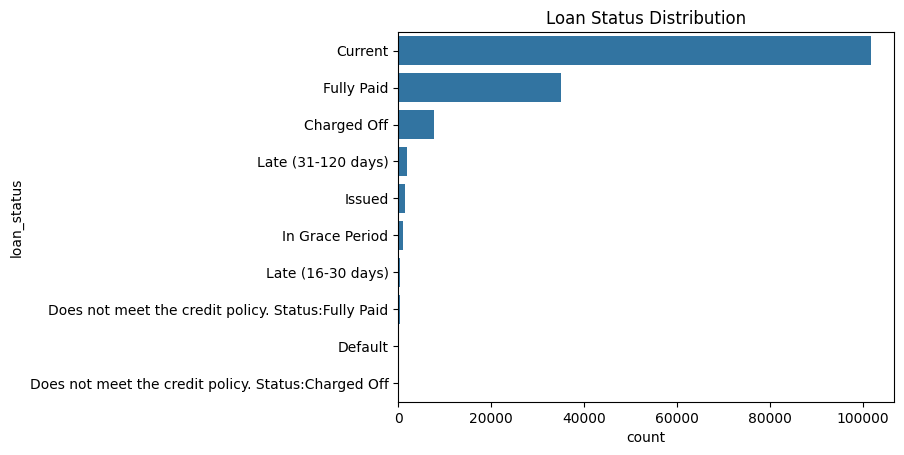

In [ ]:
sns.countplot(y='loan_status', data=df, order=df['loan_status'].value_counts().index)
plt.title("Loan Status Distribution")
plt.show()

# Clean 'term' to numeric months

In [ ]:
# Format 'term' and 'int_rate'
df['term'] = df['term'].str.extract('(\d+)').astype(float)
df['int_rate'] = df['int_rate'].astype(str).str.replace('%', '').astype(float)
df = df.dropna(subset=['int_rate'])

In [ ]:
# Target label: 1 = bad loan
df['loan_status_binary'] = df['loan_status'].apply(lambda x: 1 if x not in ['Fully Paid', 'Current'] else 0)
df.drop(columns=['loan_status'], inplace=True)

#EDA Interest Rate vs Loan Amount by Grade

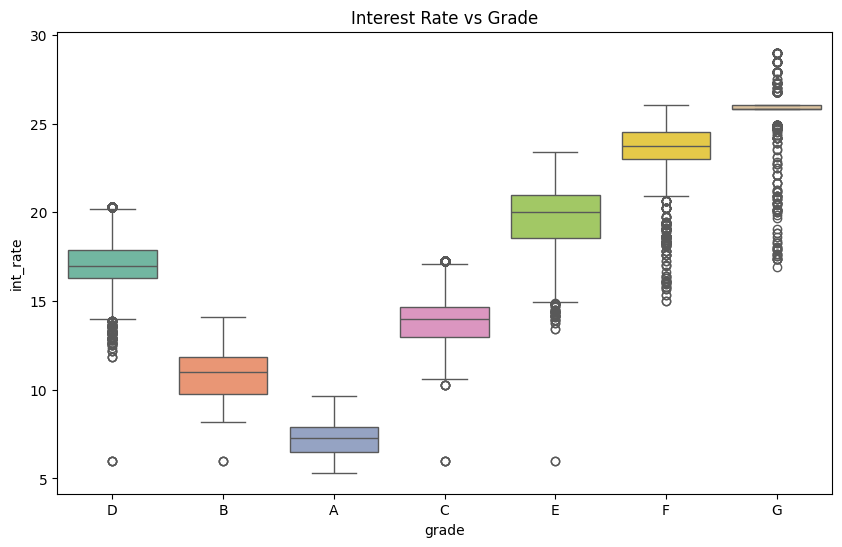

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='grade', y='int_rate', data=df, palette='Set2')
plt.title("Interest Rate vs Grade")
plt.show()

#Annual Income (log scale)

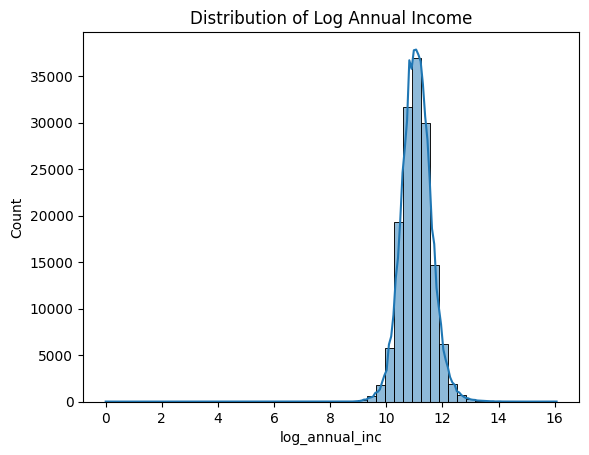

In [ ]:
df['log_annual_inc'] = np.log1p(df['annual_inc'])
sns.histplot(df['log_annual_inc'], bins=50, kde=True)
plt.title("Distribution of Log Annual Income")
plt.show()

#Feature Engineering

In [ ]:
df['log_annual_inc'] = np.log1p(df['annual_inc'])
df['log_revol_bal'] = np.log1p(df['revol_bal'])
df['income_to_installment_ratio'] = df['annual_inc'] / df['installment']

# Clean emp_length
def clean_emp_length(val):
    if pd.isnull(val): return np.nan
    if '<' in val: return 0
    if '10+' in val: return 10
    return int(val.strip().split()[0])
df['emp_length_clean'] = df['emp_length'].apply(clean_emp_length)
df.drop(columns=['emp_length'], inplace=True)

In [ ]:

# Date-based feature
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%Y')
df['credit_age_months'] = (df['issue_d'].dt.year - df['earliest_cr_line'].dt.year) * 12 + \
                          (df['issue_d'].dt.month - df['earliest_cr_line'].dt.month)
df.drop(columns=['issue_d', 'earliest_cr_line'], inplace=True)

In [ ]:
# Drop now-handled columns
df.drop(columns=['annual_inc', 'revol_bal'], inplace=True)

# One-hot encode categoricals

In [ ]:
# One-hot encode categoricals
cat_cols = df.select_dtypes(include='object').columns.tolist()
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

#Correlation Analysis

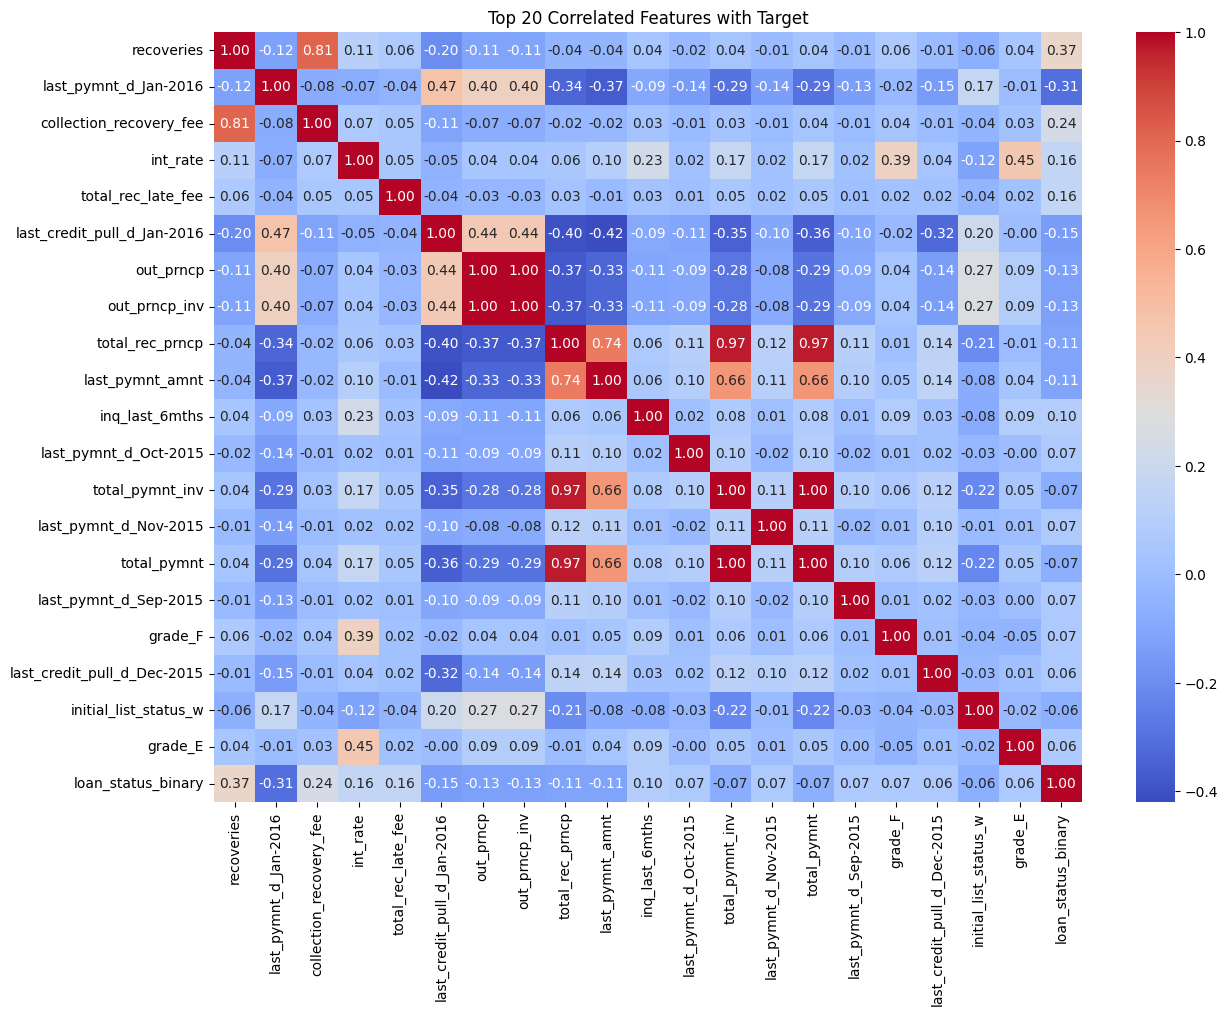

In [ ]:
X = df.drop(columns=['loan_status_binary'])
y = df['loan_status_binary']

X_df = X.copy()
X_df['loan_status_binary'] = y
corr_matrix = X_df.corr()

# Top correlated features
target_corr = corr_matrix['loan_status_binary'].drop('loan_status_binary').sort_values(ascending=False)
top_features = target_corr.abs().sort_values(ascending=False).head(20).index.tolist()
features_to_plot = top_features + ['loan_status_binary']

plt.figure(figsize=(14, 10))
sns.heatmap(X_df[features_to_plot].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Top 20 Correlated Features with Target")
plt.show()

#Prepare Data using Imputer

In [ ]:
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y, test_size=0.2, random_state=42)

#Model Training & Evaluation

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    print(f"\n--- {name} ---")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("F1 Score:", round(f1_score(y_test, y_pred), 4))
    print("ROC AUC:", round(roc_auc_score(y_test, y_prob), 4))


--- Logistic Regression ---
Accuracy: 0.9719
F1 Score: 0.8274
ROC AUC: 0.9722

--- Random Forest ---
Accuracy: 0.9743
F1 Score: 0.8371
ROC AUC: 0.9723

--- XGBoost ---
Accuracy: 0.9779
F1 Score: 0.8647
ROC AUC: 0.9811

--- Neural Network ---
Accuracy: 0.9631
F1 Score: 0.7827
ROC AUC: 0.9344


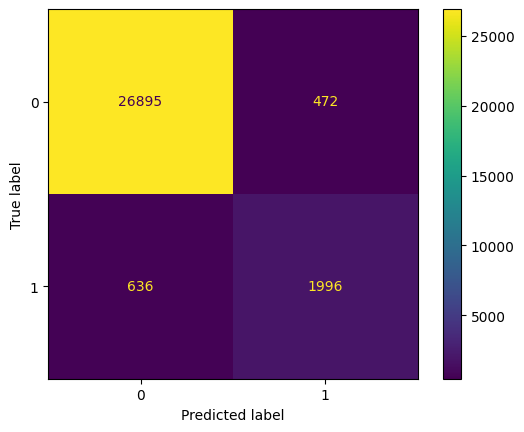

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

# Access the trained XGBoost model
xgb_model = models["XGBoost"]

# Predict using X_test
y_pred_xgb = xgb_model.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
# plt.figure(figsize=(6, 4))
# disp.plot(cmap="Blues", values_format='d')
# plt.title("Confusion Matrix: XGBoost")
# plt.show()

#PCA + SMOTE + Train/Test Split

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')  # or 'median'
X_imputed = imputer.fit_transform(X)

In [ ]:
# Step 2: Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
# Step 3: Apply PCA
pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_scaled)

In [ ]:
# Step 4: Train/Test Split (before oversampling)
X_train_pca, X_test_pca, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# Step 5: Apply SMOTE to training data only
sm = SMOTE(random_state=42)
X_train_pca, y_train = sm.fit_resample(X_train_pca, y_train)


In [ ]:
# Data is now ready: X_train_pca, X_test_pca, y_train, y_test
print(f"Training set shape after SMOTE: {X_train_pca.shape}, Target: {np.bincount(y_train)}")
print(f"Test set shape: {X_test_pca.shape}, Target: {np.bincount(y_test)}")

Training set shape after SMOTE: (191566, 277), Target: [95783 95783]
Test set shape: (44999, 277), Target: [41051  3948]


In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    y_prob = model.predict_proba(X_test_pca)[:, 1]
    print(f"\n--- {name} ---")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("F1 Score:", round(f1_score(y_test, y_pred), 4))
    print("ROC AUC:", round(roc_auc_score(y_test, y_prob), 4))


--- Logistic Regression ---
Accuracy: 0.9066
F1 Score: 0.6179
ROC AUC: 0.9493

--- Random Forest ---
Accuracy: 0.9524
F1 Score: 0.7211
ROC AUC: 0.949

--- XGBoost ---
Accuracy: 0.9544
F1 Score: 0.7546
ROC AUC: 0.9587

--- Neural Network ---
Accuracy: 0.9544
F1 Score: 0.7429
ROC AUC: 0.94


#RFE + SMOTE + Model Comparison

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFE, SelectKBest, chi2

In [ ]:


# Step 1: Use the already imputed and scaled data (X_scaled)

# Step 2: Pre-filter top 50 features using chi2 (RFE runs faster)
selector_kbest = SelectKBest(score_func=chi2, k=50)
X_kbest = selector_kbest.fit_transform(abs(X_scaled), y)  # chi2 requires non-negative values

# Step 3: Apply RFE on top 50 to get top 20
model_lr = LogisticRegression(max_iter=500, solver='liblinear')
selector = RFE(model_lr, n_features_to_select=20, step=5)
X_rfe = selector.fit_transform(X_kbest, y)

# Step 4: Train/test split
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(
    X_rfe, y, test_size=0.3, random_state=42, stratify=y
)


In [ ]:


# Step 5: SMOTE oversampling on training set
sm = SMOTE(random_state=42)
X_train_rfe, y_train = sm.fit_resample(X_train_rfe, y_train)

# Step 6: Reuse your models dictionary and evaluate
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_rfe, y_train)
    y_pred = model.predict(X_test_rfe)
    y_prob = model.predict_proba(X_test_rfe)[:, 1]
    print(f"\n--- {name} ---")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("F1 Score:", round(f1_score(y_test, y_pred), 4))
    print("ROC AUC:", round(roc_auc_score(y_test, y_prob), 4))


--- Logistic Regression ---
Accuracy: 0.8667
F1 Score: 0.438
ROC AUC: 0.7655

--- Random Forest ---
Accuracy: 0.8992
F1 Score: 0.5112
ROC AUC: 0.7893

--- XGBoost ---
Accuracy: 0.8991
F1 Score: 0.5136
ROC AUC: 0.794

--- Neural Network ---
Accuracy: 0.9137
F1 Score: 0.5457
ROC AUC: 0.7954


#SVD + SMOTE + Model Evaluation

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Step 2: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

In [ ]:
# Step 3: Apply SVD (keep 95% of variance or fixed number of components, e.g. 20)
svd = TruncatedSVD(n_components=20, random_state=42)
X_svd = svd.fit_transform(X_scaled)

# Step 4: Train/Test Split
X_train_svd, X_test_svd, y_train, y_test = train_test_split(
    X_svd, y, test_size=0.3, random_state=42, stratify=y
)

# Step 5: Oversample training set with SMOTE
sm = SMOTE(random_state=42)
X_train_svd, y_train = sm.fit_resample(X_train_svd, y_train)



In [ ]:
# Step 6: Train and evaluate the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, solver='liblinear'),
    "Random Forest": RandomForestClassifier(n_estimators=50, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "Neural Network": MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=500, random_state=42)
}

for name, model in models.items():
    model.fit(X_train_svd, y_train)
    y_pred = model.predict(X_test_svd)
    y_prob = model.predict_proba(X_test_svd)[:, 1]
    print(f"\n--- {name} ---")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("F1 Score:", round(f1_score(y_test, y_pred), 4))
    print("ROC AUC:", round(roc_auc_score(y_test, y_prob), 4))


--- Logistic Regression ---
Accuracy: 0.7664
F1 Score: 0.3122
ROC AUC: 0.7665

--- Random Forest ---
Accuracy: 0.9361
F1 Score: 0.628
ROC AUC: 0.9143

--- XGBoost ---
Accuracy: 0.8941
F1 Score: 0.5567
ROC AUC: 0.9196

--- Neural Network ---
Accuracy: 0.9323
F1 Score: 0.6775
ROC AUC: 0.9429


#Implementing SHAP to find out the features

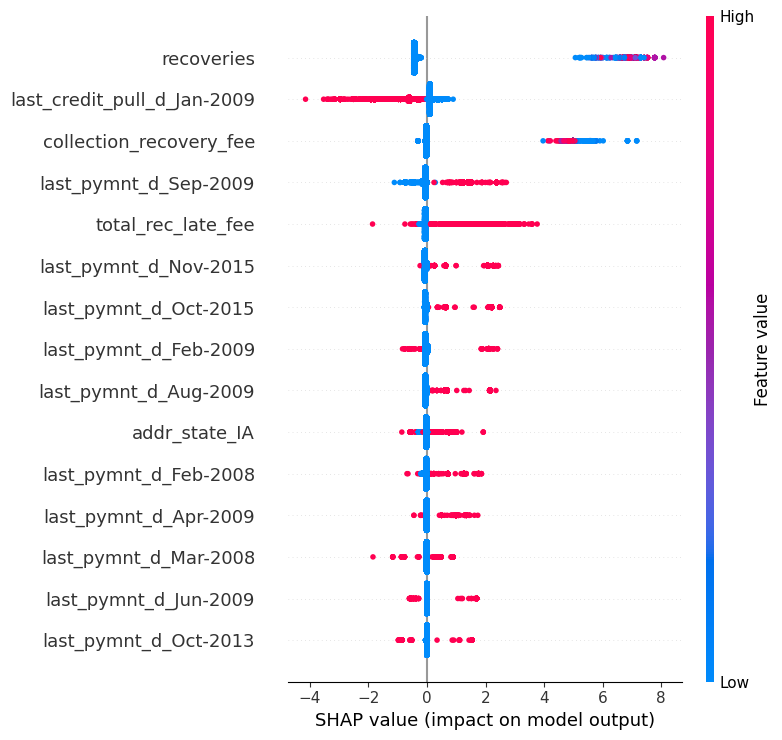

In [ ]:
import shap


models['XGBoost'].fit(X_train_rfe, y_train)

# Explain predictions using TreeExplainer
explainer = shap.TreeExplainer(models['XGBoost'])
shap_values = explainer.shap_values(X_test_rfe)

# Get top 15 features based on mean absolute SHAP values
mean_abs_shap = np.abs(shap_values).mean(axis=0)
top_indices = np.argsort(mean_abs_shap)[-15:]

#  Pre-filter top 50 features using chi2 (RFE runs faster)
selector_kbest = SelectKBest(score_func=chi2, k=20)
X_kbest = selector_kbest.fit_transform(abs(X_scaled), y)  # chi2 requires non-negative values
selected_feature_names = X.columns[selector_kbest.get_support()]
X_test_rfe = pd.DataFrame(X_test_rfe, columns=selected_feature_names)
# Get the names of the top features (assuming X_test_rfe is a DataFrame)
top_feature_names = X_test_rfe.columns[top_indices]

# Slice the test set and SHAP values to only include top features
X_test_top = X_test_rfe[top_feature_names]
shap_values_top = shap_values[:, top_indices]

# Plot summary plot with feature names
shap.summary_plot(shap_values_top, X_test_top, feature_names=top_feature_names)

